In [1]:
import os
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [32]:
blockdf=pd.read_csv( r"C:\Users\Jimmy\Desktop\Data606\Data\ethdata.csv")
pricedf=pd.read_csv( r"C:\Users\Jimmy\Desktop\Data606\Data\priceandvolume.csv")
addresses=pd.read_csv( r"C:\Users\Jimmy\Desktop\Data606\Data\uniqueaddresses.csv")
trend=pd.read_csv( r"C:\Users\Jimmy\Desktop\Data606\Data\googletrends.csv")

In [59]:
blockdf.head()

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMrktCurUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
date,,,,,,,,,,,,,,,,,,,,,
2015-07-30,9206,6911,4449897,643.886124,NaN,1.213350e+11,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2015-07-31,424,6863,3994458,582.027976,NaN,6.029420e+11,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2015-08-01,413,5293,3044344,575.164179,NaN,8.872540e+11,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2015-08-02,432,5358,3112348,580.878686,NaN,1.020250e+12,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2015-08-03,444,5280,3099953,587.112311,NaN,1.125840e+12,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [185]:
#got data on ethereum mining
blockdf.describe()


,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMrktCurUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
count,1.671000e+03,1671.000000,1.671000e+03,1671.000000,1.662000e+03,1.671000e+03,1663.000000,1662.000000,1663.000000,1662.000000,...,1.662000e+03,1663.000000,1662.000000,1.663000e+03,1.662000e+03,1.671000e+03,1.662000e+03,1482.000000,1632.000000,1602.000000
mean,2.069173e+05,5714.706164,7.462532e+07,12867.490151,2.021060e+10,1.481593e+15,0.001166,0.216478,0.000526,0.096456,...,5.478543e+08,50.328131,3883.990876,6.742222e-01,5.670977e+01,4.620299e+06,1.278430e+09,0.060825,0.058467,0.059697
std,3.216741e+05,714.078592,6.037895e+07,10064.650232,2.325922e+10,1.267489e+15,0.001348,0.415785,0.000409,0.215331,...,8.934533e+08,172.215500,6253.061889,9.994843e-01,1.148810e+02,5.863804e+06,2.679758e+09,0.014860,0.024721,0.020898
min,3.960000e+02,2829.000000,2.555486e+06,575.164179,3.117112e+07,1.213350e+11,0.000373,0.000690,0.000063,0.000441,...,4.108459e+04,2.225331,6.332513,1.000000e-18,8.800000e-19,0.000000e+00,5.555918e+04,0.035313,0.017667,0.022943
25%,1.883850e+04,5338.500000,9.456684e+06,1569.252167,9.594568e+08,6.824385e+13,0.000664,0.009422,0.000310,0.005258,...,1.475096e+07,6.633727,517.832919,1.091564e-01,1.060515e+01,1.305401e+06,1.954668e+07,0.049341,0.038576,0.042436
50%,2.140270e+05,5962.000000,8.806590e+07,16448.375000,1.606777e+10,1.822640e+15,0.000793,0.102862,0.000420,0.039848,...,2.746892e+08,16.435929,1219.275999,3.313199e-01,1.838396e+01,2.140845e+06,3.538108e+08,0.060323,0.051246,0.054787
75%,3.093070e+05,6113.500000,1.313425e+08,21585.270735,2.819423e+10,2.500620e+15,0.001250,0.235821,0.000523,0.094538,...,6.773584e+08,49.797750,3106.410623,1.006722e+00,5.311243e+01,4.587412e+06,9.627448e+08,0.072935,0.074352,0.076406
max,7.157228e+06,6911.000000,3.793044e+08,58220.161470,1.338230e+11,3.606040e+15,0.023638,5.700029,0.005674,2.922984,...,8.341080e+09,5101.056788,51996.083160,1.610418e+01,1.223965e+03,4.712832e+07,3.421550e+10,0.096949,0.133661,0.119038


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002E855E7F708>,
      dtype=object)

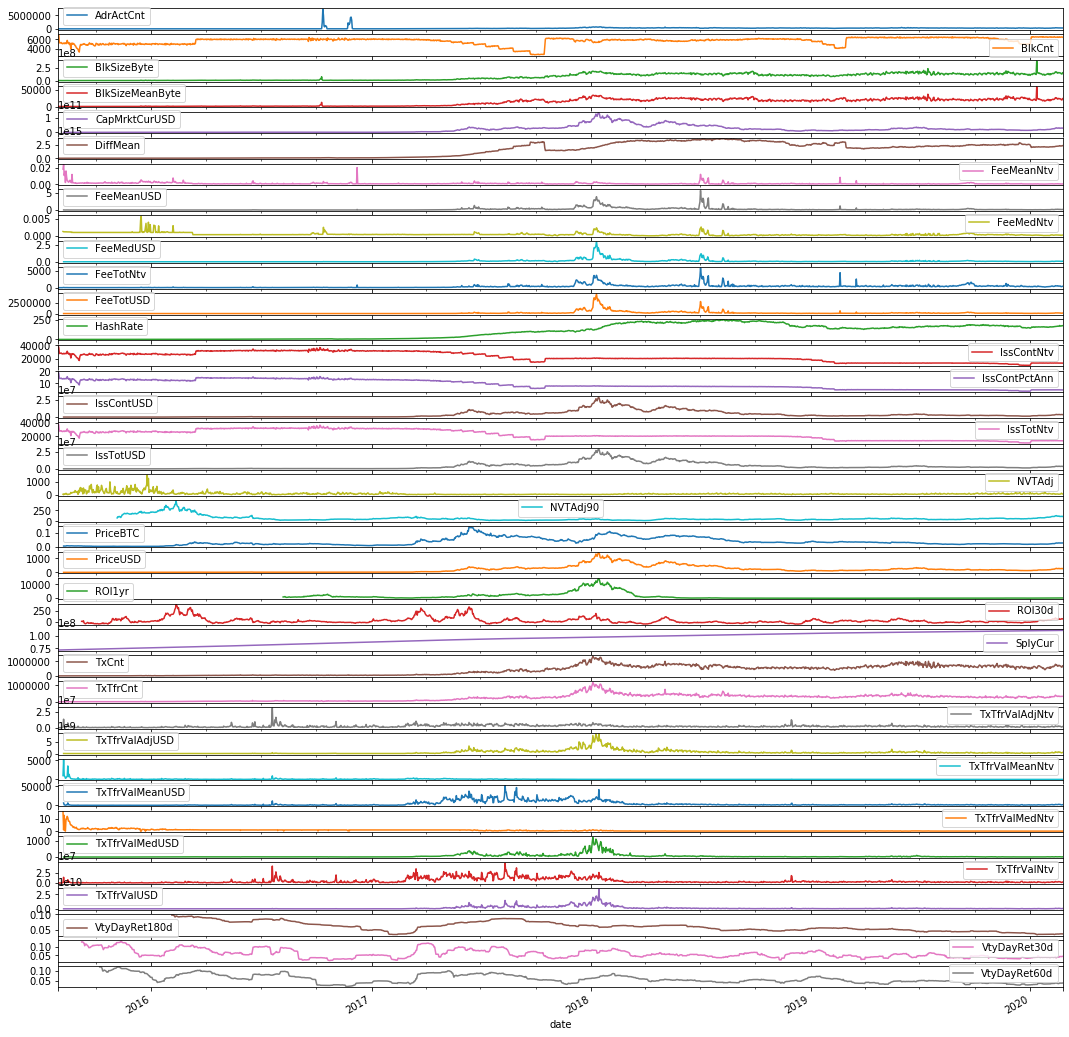

In [17]:
#I like to start by plotting everything and seeing what "pops" out
#From the below figures, addresses, fee, and tx count look interesting
blockdf.plot(subplots=True,figsize=(18, 20))

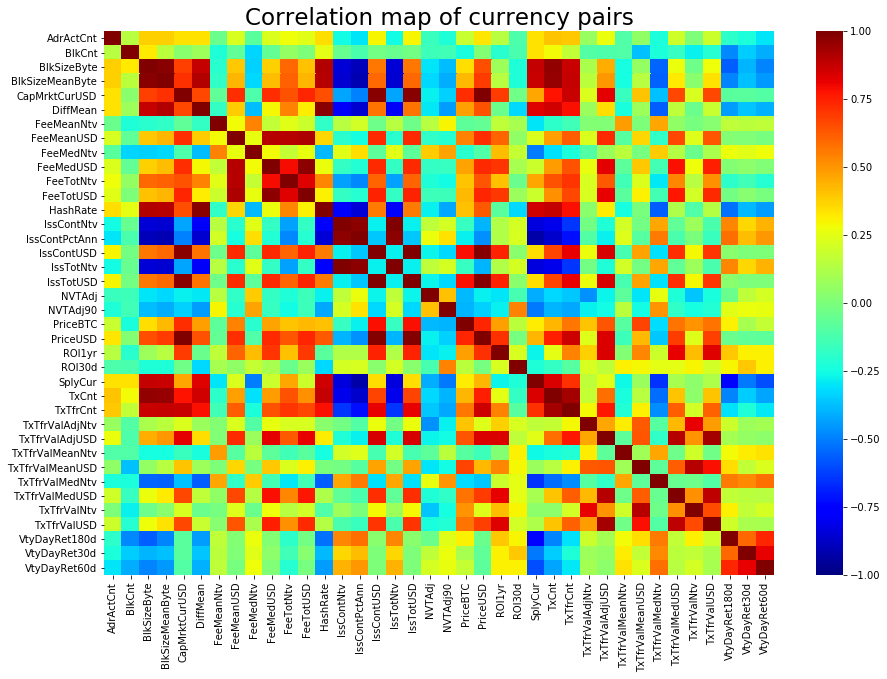

In [88]:
#Looking for what correlates most to PriceUSD besides other pricing metrics...
#This heatmap kind of confirms my above hypothesis

corr_mat = blockdf.corr()

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
sns.heatmap(corr_mat, vmin=-1, vmax=1, cmap="jet")
ax.set_title('Correlation map of currency pairs', fontsize=23)
plt.show()

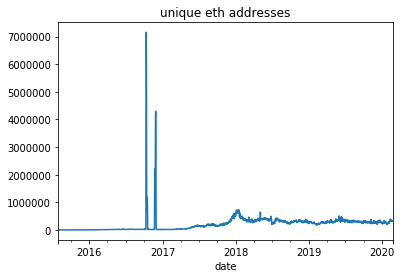

In [82]:
#Going to start with looking at addresses, addresses are where users store their funds like a bank account. This can give a rough estimate for how many people are using
#Active addresses are filtering out accounts that havent had funds move in/out recently
blockdf['date'] = pd.to_datetime(blockdf['date'])
blockdf.set_index('date' ,inplace=True)
blockdf['AdrActCnt'].plot(title='unique eth addresses')
# Need to investigate unique address spike 
#2/28 discovered spike due to ddos attack

Text(0, 0.5, 'Count in million')

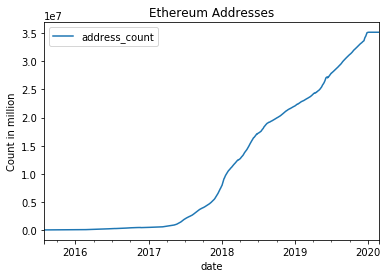

In [158]:
addresses['date'] = pd.to_datetime(addresses['date'])
addresses.set_index('date' ,inplace=True)
addresses.plot(title='Ethereum Addresses')
plt.ylabel('Count in million')
#looks like address count really took off in late 2017

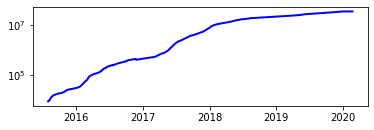

In [68]:
#plotting addresses with log scale 
import pylab
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
line, = ax.plot(addresses, color='blue', lw=2)

ax.set_yscale('log')

pylab.show()

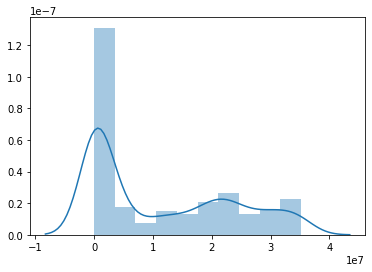

In [37]:
sns.distplot(addresses)

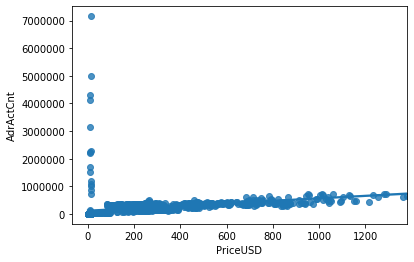

In [72]:
#Tough to use active addresses to explain pricing due to the outliers
sns.regplot(x=blockdf['PriceUSD'], y=blockdf['AdrActCnt'])

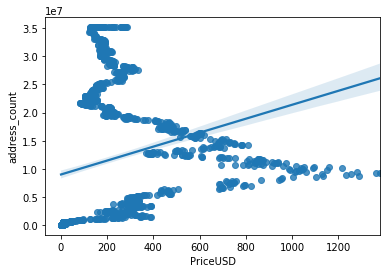

In [78]:
#How does total address count stack up?
#Looks all over the place, but there is soem corelation
sns.regplot(x=blockdf['PriceUSD'], y=addresses)

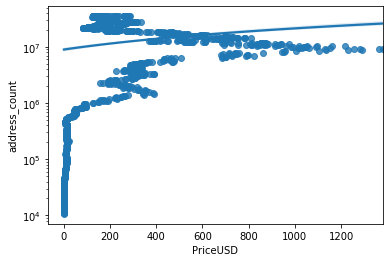

In [77]:
#inquitivey you would think log scale would be better due to the exponential growth of crypto...
sns.regplot(x=blockdf['PriceUSD'], y=addresses)
plt.yscale('log')


In [56]:
#I think this data is redudnant, probably not going to use
pricedf.head()

,Date,Open*,High,Low,Close**,Volume,Market Cap
date,,,,,,,
2020-02-23,23-Feb-20,262.28,273.75,261.96,273.75,"19,585,998,814","30,065,188,433"
2020-02-22,22-Feb-20,265.55,266.39,258.91,262.33,"16,906,032,862","28,807,130,266"
2020-02-21,21-Feb-20,257.89,267,255.69,265.6,"20,867,593,292","29,162,464,509"
2020-02-20,20-Feb-20,259.82,263.7,250.95,257.95,"23,229,828,870","28,318,879,771"
2020-02-19,19-Feb-20,282.04,283.54,259.76,259.76,"22,679,414,413","28,514,562,065"


In [53]:
pricedf['date'] = pd.to_datetime(pricedf['Date'])
pricedf.set_index('date' ,inplace=True)



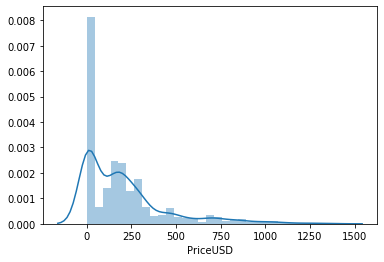

In [61]:
sns.distplot(blockdf['PriceUSD'])

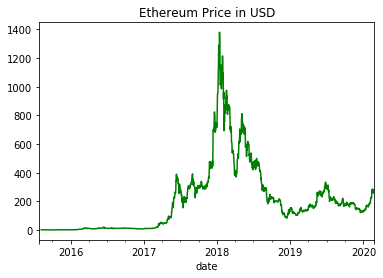

In [168]:
blockdf['PriceUSD'].plot(y='price',x='date',title='Ethereum Price in USD',color='green')


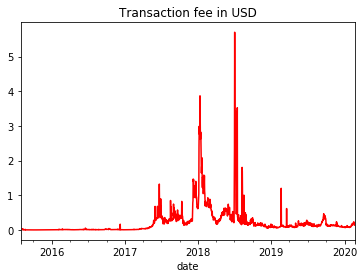

In [179]:
#Fee is the cost to send an ethereum transaction, it is affected by activity (the more people sending the more it costs)
#A spike in fee means more people are using Ethereum or that there is an issue with the network
blockdf['FeeMeanUSD'].plot(title='Transaction fee in USD', color='red',)


Text(0.5, 1.0, 'price/fee relationship')

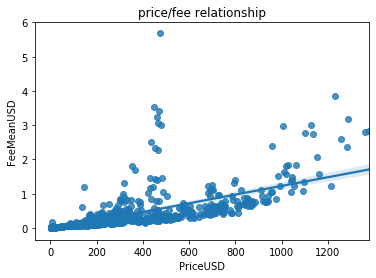

In [183]:
#This looks quite useful! One possibility is that during high prices folks use it more to buy/sell, or perhaps increased activity brings more investors. Either way, useful for my model
sns.regplot(x=blockdf['PriceUSD'], y=blockdf['FeeMeanUSD']).set_title('price/fee relationship')


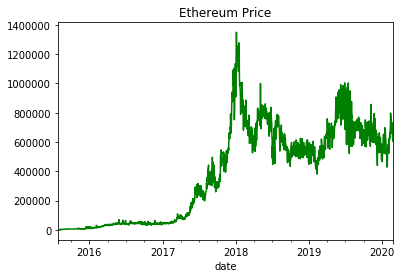

In [163]:
#Since fee are useful what about transaction count? Shouldnt fees be a derive from that?
blockdf['TxCnt'].plot(title='Ethereum Price',color='green')



In [128]:
#Final clean data set, I am taking the above elements and appending to the exchange data for Ethereum 
newdf=blockdf['TxCnt']#['FeeMeanUSD']
newdf=newdf+ blockdf['FeeMeanUSD']
newdf = pd.DataFrame()
newdf['PriceUSD']=blockdf['PriceUSD']
newdf['TxCnt']=blockdf['TxCnt']
newdf['FeeMeanUSD']=blockdf['FeeMeanUSD']
newdf['AdrActCnt']=blockdf['AdrActCnt']
newdf['TotalAddresses']=addresses

newdf.head()

#To do: Merge in exchange data and trend data

,PriceUSD,TxCnt,FeeMeanUSD,AdrActCnt,TotalAddresses
date,,,,,
2015-07-30,NaN,0,NaN,9206,9203
2015-07-31,NaN,0,NaN,424,9359
2015-08-01,NaN,0,NaN,413,9474
2015-08-02,NaN,0,NaN,432,9561
2015-08-03,NaN,0,NaN,444,9637


In [187]:
#Note, part of next section taken from https://www.kaggle.com/tencars/bitfinexdataset. Credit goes to Karsten 
#loading in Data from exchange
# Data path
#input_path = "../input/cryptominuteresolution"
input_path = r"C:\Users\Jimmy\Desktop\Data606\Data\bitfinex"

# Get names and number of available currency pairs
pair_names = [x[:-4] for x in os.listdir(input_path)]
n_pairs = len(pair_names)

# Print the first 50 currency pair names
print("These are the first 50 out of {} currency pairs in the dataset:".format(n_pairs))
print(pair_names[0:50])
def load_data(symbol, source=input_path):
    path_name = source + "/" + symbol + ".csv"
    
    # Load data
    df = pd.read_csv(path_name, index_col='time')
    
    # Convert timestamp to datetime
    df.index = pd.to_datetime(df.index, unit='ms')
    
    # As mentioned in the description, bins without any change are not recorded.
    # We have to fill these gaps by filling them with the last value until a change occurs.
    df = df.resample('1T').pad()
    
    return df

These are the first 50 out of 429 currency pairs in the dataset:
['abseth', 'absusd', 'agibtc', 'agieth', 'agiusd', 'aidbtc', 'aideth', 'aidusd', 'aiobtc', 'aioeth', 'aiousd', 'algbtc', 'algusd', 'algust', 'ampbtc', 'ampusd', 'ampust', 'antbtc', 'anteth', 'antusd', 'asteth', 'astusd', 'atmbtc', 'atmeth', 'atmusd', 'atobtc', 'atoeth', 'atousd', 'aucbtc', 'auceth', 'aucusd', 'avtbtc', 'avteth', 'avtusd', 'babbtc', 'babusd', 'babust', 'batbtc', 'bateth', 'batusd', 'bbneth', 'bbnusd', 'bcibtc', 'bciusd', 'bftbtc', 'bfteth', 'bftusd', 'bntbtc', 'bnteth', 'bntusd']


In [189]:
def load_data(symbol, source=input_path):
    path_name = source + "/" + symbol + ".csv"
    
    # Load data
    df = pd.read_csv(path_name, index_col='time')
    
    # Convert timestamp to datetime
    df.index = pd.to_datetime(df.index, unit='ms')
    
    # As mentioned in the description, bins without any change are not recorded.
    # We have to fill these gaps by filling them with the last value until a change occurs.
    df = df.resample('1T').pad()
    
    return df
btcusd = load_data("btcusd")
ethusd = load_data("ethusd")
ltcusd = load_data("ltcusd")
xrpusd = load_data("xrpusd")
bsvusd = load_data('bsvusd')
eosusd = load_data('eosusd')
xtzusd = load_data('xtzusd')
# Take a look at the head of the BTC/USD data
btcusd.head()

F:\Users\Jimmy\Anaconda\envs\Crypto\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,open,close,high,low,volume
time,,,,,
2013-04-01 00:07:00,93.25,93.30,93.30,93.25,93.300000
2013-04-01 00:08:00,100.00,100.00,100.00,100.00,93.300000
2013-04-01 00:09:00,93.30,93.30,93.30,93.30,33.676862
2013-04-01 00:10:00,93.30,93.30,93.30,93.30,33.676862
2013-04-01 00:11:00,93.35,93.47,93.47,93.35,20.000000


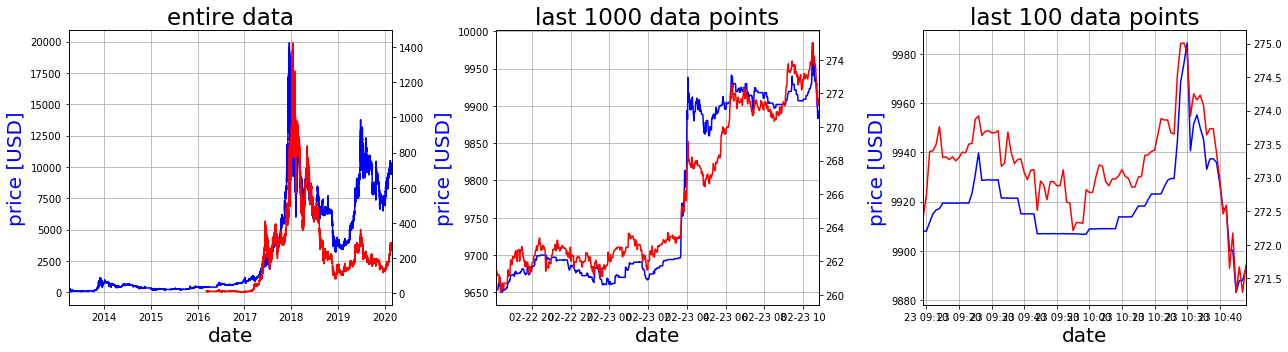

In [190]:
# Set up the sub plots
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Plot the data
ax[0].plot(btcusd['close'], color='blue', label='BTC/USD')
ax[0].set_ylabel('price [USD]', fontsize=20, color='blue')
ax[0].set_xlabel('date', fontsize=20)
ax[0].set_title('entire data', fontsize=23)
ax[0].set_xlim([btcusd.index[0], btcusd.index[-1]])
ax[0].grid()

ax[0].twinx().plot(ethusd['close'], color='red', label='ETH/USD')

ax[1].plot(btcusd['close'].iloc[-1000:], color='blue', label='BTC/USD')
ax[1].set_ylabel('price [USD]', fontsize=20, color='blue')
ax[1].set_xlabel('date', fontsize=20)
ax[1].set_title('last 1000 data points', fontsize=23)
ax[1].set_xlim([btcusd.index[-1000], btcusd.index[-1]])
ax[1].grid()

ax[1].twinx().plot(ethusd['close'].iloc[-1000:], color='red', label='ETH/USD')

ax[2].plot(btcusd['close'].iloc[-100:], color='blue', label='BTC/USD')
ax[2].set_ylabel('price [USD]', fontsize=20, color='blue')
ax[2].set_xlabel('date', fontsize=20)
ax[2].set_title('last 100 data points', fontsize=23)
ax[2].set_xlim([btcusd.index[-100], btcusd.index[-1]])
ax[2].grid()

ax[2].twinx().plot(ethusd['close'].iloc[-100:], color='red', label='ETH/USD')

fig.tight_layout()
plt.show()

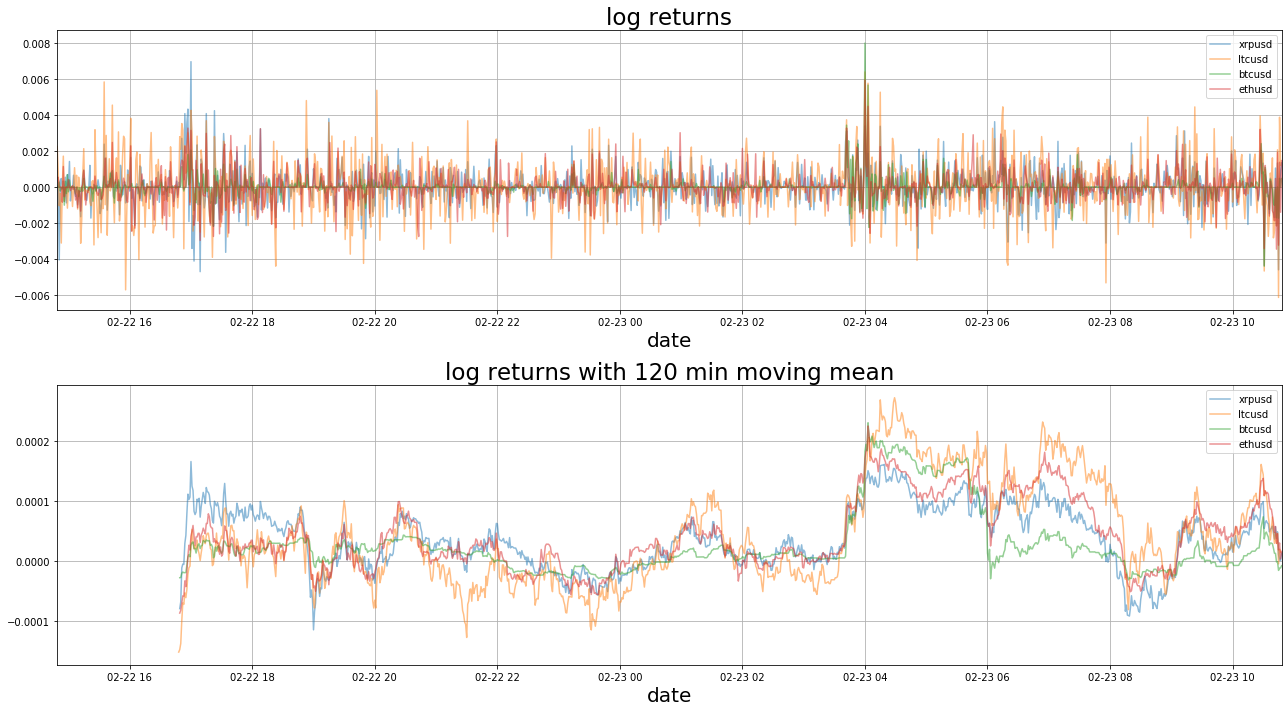

In [191]:
def log_return(data):
    return np.log(data.shift(0)/data.shift(1))# Define the parameters for the moving mean
n_ticks = 1200
rolling_mean = 120

fig, ax = plt.subplots(2, 1, figsize=(18, 10))

ax[0].plot(log_return(xrpusd['close'].iloc[-n_ticks:]), alpha=0.5, label='xrpusd')
ax[0].plot(log_return(ltcusd['close'].iloc[-n_ticks:]), alpha=0.5, label='ltcusd')
ax[0].plot(log_return(btcusd['close'].iloc[-n_ticks:]), alpha=0.5, label='btcusd')
ax[0].plot(log_return(ethusd['close'].iloc[-n_ticks:]), alpha=0.5, label='ethusd')

ax[0].set_xlim([ethusd.index[-1200], ethusd.index[-1]])
ax[0].set_title('log returns', fontsize=23)
ax[0].set_xlabel('date', fontsize=20)
ax[0].grid()
ax[0].legend()

ax[1].plot(log_return(xrpusd['close'].iloc[-n_ticks:].rolling(rolling_mean).mean()), alpha=0.5, label='xrpusd')
ax[1].plot(log_return(ltcusd['close'].iloc[-n_ticks:].rolling(rolling_mean).mean()), alpha=0.5, label='ltcusd')
ax[1].plot(log_return(btcusd['close'].iloc[-n_ticks:].rolling(rolling_mean).mean()), alpha=0.5, label='btcusd')
ax[1].plot(log_return(ethusd['close'].iloc[-n_ticks:].rolling(rolling_mean).mean()), alpha=0.5, label='ethusd')

ax[1].set_xlim([ethusd.index[-1200], ethusd.index[-1]])
ax[1].set_title('log returns with {} min moving mean'.format(rolling_mean), fontsize=23)
ax[1].set_xlabel('date', fontsize=20)
ax[1].grid()
ax[1].legend()

fig.tight_layout()
plt.show()

In [192]:
# Load currency pairs and calculate the moving mean
data = pd.DataFrame()
col_names = []
for pair in pair_names[0:10]:
    tmp = load_data(pair)
    data = pd.concat([data, log_return(tmp.close).rolling(rolling_mean).mean()], axis=1)
    col_names.append(pair)
    
data.columns = col_names
data.dropna(how='all', axis=1, inplace=True)

In [194]:
#Making a heatmap of the largest and most trade currencies, no surprise that they highly correlatetop7data= pd.DataFrame()
top7data= pd.DataFrame()
top7=['btcusd','ethusd','xrpusd','bsvusd','ltcusd','eosusd','xtzusd']
for pair in top7:
    tmp = load_data(pair)
    top7data = pd.concat([top7data, log_return(tmp.close).rolling(rolling_mean).mean()], axis=1)
top7data.columns = top7
top7data.dropna(how='all', axis=1, inplace=True)    


In [ ]:
big4data= pd.DataFrame()
big4=['btcusd','ethusd','ltcusd','xrpusd']
for pair in big4:
    tmp = load_data(pair)
    big4data = pd.concat([big4data, log_return(tmp.close).rolling(rolling_mean).mean()], axis=1)
big4data.columns = big4
big4data.dropna(how='all', axis=1, inplace=True)    

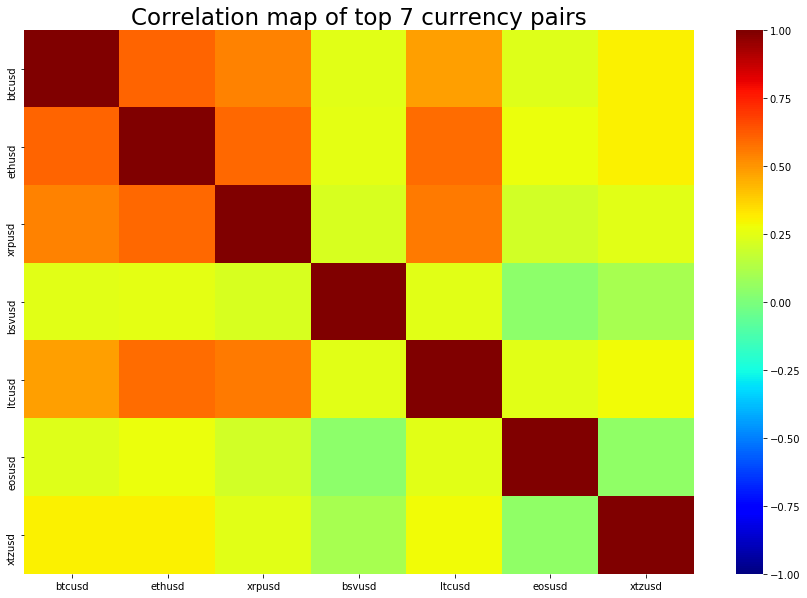

In [195]:
corr_mat = top7data.corr()

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
sns.heatmap(corr_mat, vmin=-1, vmax=1, cmap="jet")
ax.set_title('Correlation map of top 7 currency pairs', fontsize=23)
plt.show()

In [ ]:
#To do, make new column that adjusts volume to be in USD